<a href="https://colab.research.google.com/github/jadercaro/ModelosYSimulacion/blob/main/onTimeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
airlines_delay=pd.read_csv("airlines_delay.csv")

FileNotFoundError: ignored

##Ver la información general de los datos en la BD

In [2]:
airlines_delay.info()

NameError: ignored

In [ ]:
airlines_delay.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
airlines_delay.shape

(539382, 8)

##Convertir la variable flight a tipo objeto

In [ ]:
airlines_delay["Flight"] = airlines_delay["Flight"].astype(object)
airlines_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  object 
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 32.9+ MB


##Analizar la recurrencia de la variable Flight en la BD

In [ ]:
id = airlines_delay['Flight']

<AxesSubplot:>

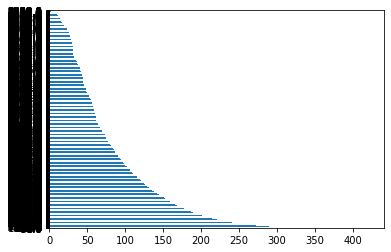

In [ ]:
id.value_counts().plot.barh()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
 #   print(id_flights)

In [ ]:
print(id.value_counts())

16.0      420
5.0       407
9.0       401
8.0       396
62.0      364
         ... 
7814.0      1
4544.0      1
5131.0      1
6969.0      1
3518.0      1
Name: Flight, Length: 6585, dtype: int64


<AxesSubplot:xlabel='Flight', ylabel='count'>

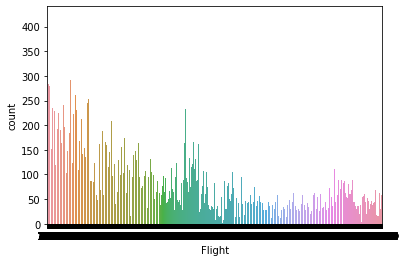

In [ ]:
sns.countplot(x=airlines_delay['Flight'])

##Análisis de variables categóricas

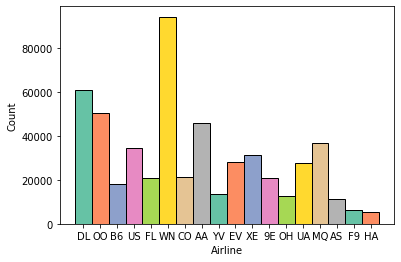

In [ ]:
#Histograma de la varaiable 'Airline' para conocer la proporción de los datos
cm = sns.color_palette("Set2", 18)
plot=sns.histplot(airlines_delay['Airline'])
for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

In [ ]:
#Filtro para seleccionar las aerolíneas que llegaron a tiempo
airline_on_time = airlines_delay['Class']==0

In [ ]:
#Base de datos sólo con las aerolíneas que llegaron a tiempo
airlines_on_time = airlines_delay[airline_on_time]

In [ ]:
airlines_on_time.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


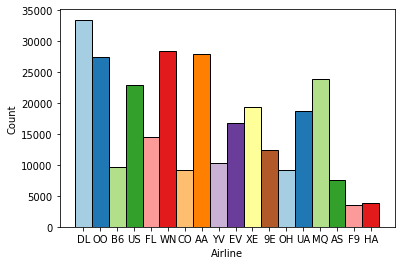

In [ ]:
#proporción de aerolíneas que llegaron a tiempo
cm = sns.color_palette("Paired", 18)
plot = sns.histplot(airlines_on_time['Airline'])
for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

In [ ]:
airport_from_counts = airlines_delay['AirportFrom'].value_counts()

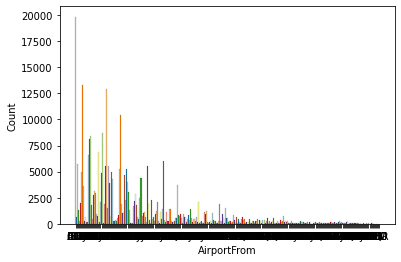

In [ ]:
cm = sns.color_palette("Paired", 293)
plot = sns.histplot(airlines_on_time['AirportFrom'])
for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

##Codificación de las variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
params = []
categorial_features = ["Flight", "Airline", "AirportFrom", "AirportTo"]

for f in categorial_features:
  encoder.fit(airlines_delay[f])
  airlines_delay[f] = encoder.transform(airlines_delay[f])
  params.append(np.array(encoder.classes_))

In [ ]:
for i in range(0, len(params)):
  print('Variable: ',categorial_features[i],params[i], sep='\n')

Variable: 
Flight
[1.0 2.0 3.0 ... 7812.0 7813.0 7814.0]
Variable: 
Airline
['9E' 'AA' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'OH' 'OO' 'UA'
 'US' 'WN' 'XE' 'YV']
Variable: 
AirportFrom
['ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'ALB' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO' 'BDL' 'BET'
 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BKG' 'BLI' 'BMI' 'BNA' 'BOI' 'BOS'
 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR' 'BWI' 'BZN' 'CAE'
 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID' 'CLD' 'CLE' 'CLL'
 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'COU' 'CPR' 'CRP' 'CRW' 'CSG' 'CVG'
 'CWA' 'CYS' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLH' 'DRO'
 'DSM' 'DTW' 'EAU' 'ECP' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GTF' 'GTR' 'GUC' 'GUM' 'HDN' 'HLN' 'HNL' 'HOU' 'HPN' 'HRL'
 'HSV

In [ ]:
display(airlines_delay)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2308,1296.0,141.0,5,16,129,1,0
1,6198,360.0,146.0,12,65,208,4,0
2,1243,1170.0,143.0,3,35,60,3,0
3,29,1410.0,344.0,14,203,217,6,0
4,561,692.0,98.0,8,32,16,4,0
...,...,...,...,...,...,...,...,...
539377,6223,530.0,72.0,12,111,252,5,1
539378,1260,560.0,115.0,15,153,79,4,1
539379,5004,827.0,74.0,6,47,16,2,1
539380,605,715.0,65.0,15,45,43,4,1


In [1]:
airlines_delay.to_csv('datos_preparados',index=False)

NameError: ignored